In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/daibetes_cleandata.csv')

In [5]:
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

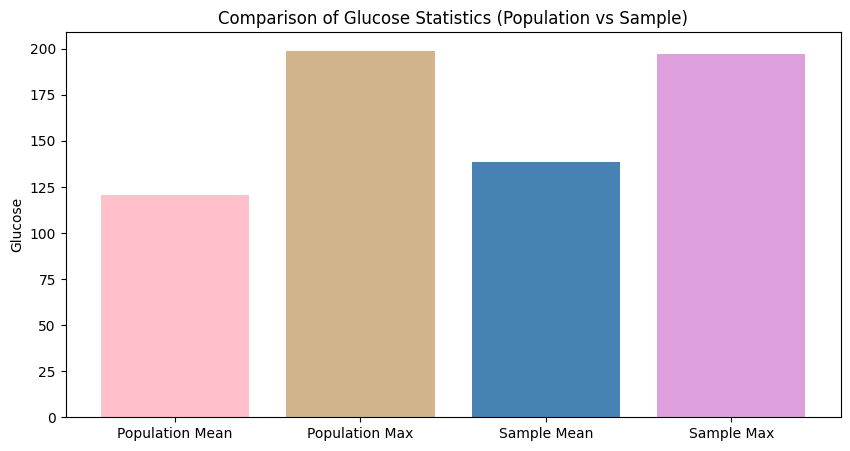

In [17]:
sample_data = data.sample(n=25)

glucose_mean = data['Glucose'].mean()
glucose_max = data['Glucose'].max()
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()

plt.figure(figsize=(10, 5))
plt.bar(['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max'],
        [glucose_mean, glucose_max, sample_mean_glucose, sample_max_glucose],color=['pink','tan','steelblue','plum'])
plt.title('Comparison of Glucose Statistics (Population vs Sample)')
plt.ylabel('Glucose')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

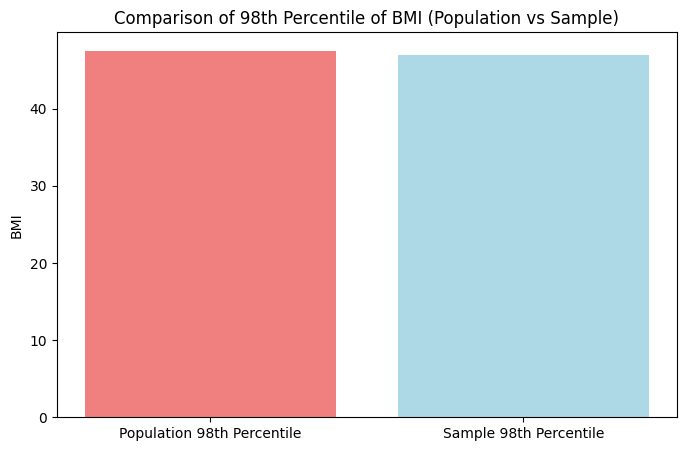

In [21]:
population_98thbmi = np.percentile(data['BMI'], 98)
sample_98thbmi = np.percentile(sample_data['BMI'], 98)

plt.figure(figsize=(8, 5))
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'],
        [population_98thbmi, sample_98thbmi],color=['lightcoral','lightblue'])
plt.title('Comparison of 98th Percentile of BMI (Population vs Sample)')
plt.ylabel('BMI')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [14]:
import seaborn as sns

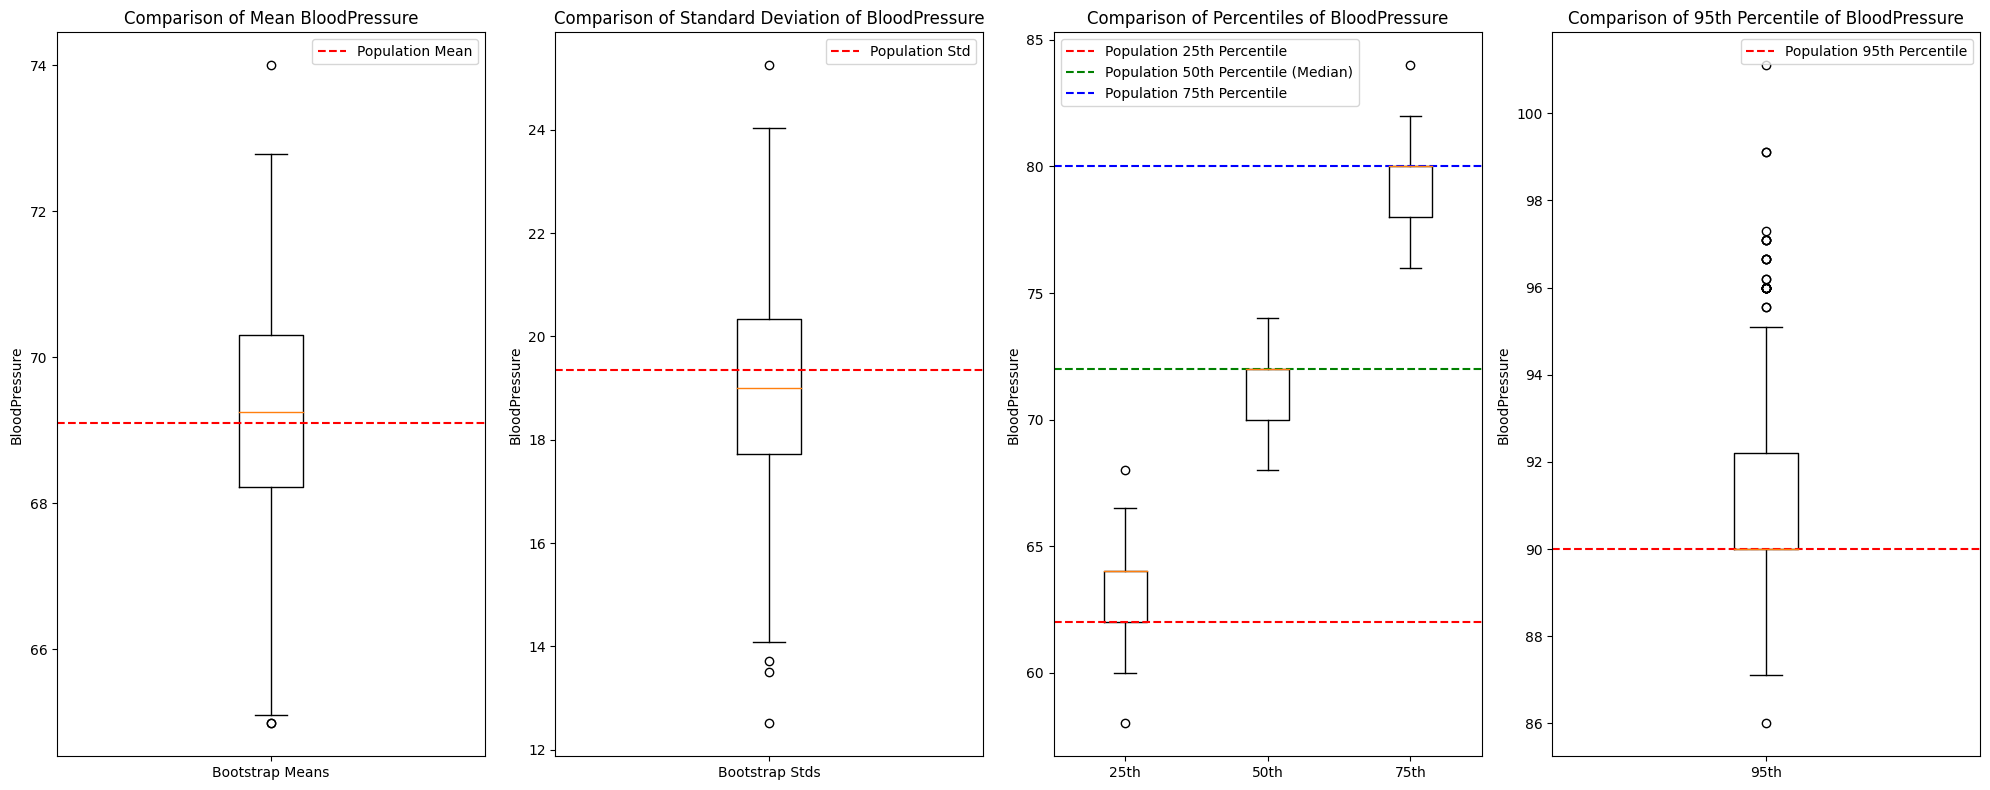

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define population statistics
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentile_25 = np.percentile(data['BloodPressure'], 25)
population_percentile_50 = np.percentile(data['BloodPressure'], 50)
population_percentile_75 = np.percentile(data['BloodPressure'], 75)
population_percentile_95 = np.percentile(data['BloodPressure'], 95)


n_bootstrap = 500
bootstrap_size = 150


bootstrap_samples = np.array([np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True) for _ in range(n_bootstrap)])

bootstrap_means = np.mean(bootstrap_samples, axis=1)
bootstrap_stds = np.std(bootstrap_samples, axis=1)
bootstrap_percentiles_25 = np.percentile(bootstrap_samples, 25, axis=1)
bootstrap_percentiles_50 = np.percentile(bootstrap_samples, 50, axis=1)
bootstrap_percentiles_75 = np.percentile(bootstrap_samples, 75, axis=1)
bootstrap_percentiles_95 = np.percentile(bootstrap_samples, 95, axis=1)


plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.boxplot([bootstrap_means], labels=['Bootstrap Means'])
plt.axhline(y=population_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Comparison of Mean BloodPressure')
plt.ylabel('BloodPressure')
plt.legend()

plt.subplot(1, 4, 2)
plt.boxplot([bootstrap_stds], labels=['Bootstrap Stds'])
plt.axhline(y=population_std, color='red', linestyle='--', label='Population Std')
plt.title('Comparison of Standard Deviation of BloodPressure')
plt.ylabel('BloodPressure')
plt.legend()

plt.subplot(1, 4, 3)
plt.boxplot([bootstrap_percentiles_25, bootstrap_percentiles_50, bootstrap_percentiles_75], labels=['25th', '50th', '75th'])
plt.axhline(y=population_percentile_25, color='red', linestyle='--', label='Population 25th Percentile')
plt.axhline(y=population_percentile_50, color='green', linestyle='--', label='Population 50th Percentile (Median)')
plt.axhline(y=population_percentile_75, color='blue', linestyle='--', label='Population 75th Percentile')
plt.title('Comparison of Percentiles of BloodPressure')
plt.ylabel('BloodPressure')
plt.legend()

plt.subplot(1, 4, 4)
plt.boxplot([bootstrap_percentiles_95], labels=['95th'])
plt.axhline(y=population_percentile_95, color='red', linestyle='--', label='Population 95th Percentile')
plt.title('Comparison of 95th Percentile of BloodPressure')
plt.ylabel('BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()
